In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


reqs = pd.read_json('training/requests.txt', lines=True, orient='records')
reqs.set_index('url', inplace=True)
reqs = reqs[~reqs.index.duplicated(keep='first')]

fb = pd.read_json('training/feedback.txt', lines=True, orient='records')
fb.drop(columns=['time'], inplace=True)
fb = fb.pivot_table(index='url', columns='action', aggfunc=len, fill_value=0)

df = reqs.join(fb, how='inner')
df.head()

,author,content,description,publishedAt,score,source,title,urlToImage,click,view
url,,,,,,,,,,
https://www.newscientist.com/article/2192364-weve-hacked-the-curiosity-rover-to-learn-how-mountains-form-on-mars/,Leah Crane,NASA/JPL-Caltech/MSSS\r\nBy Leah Crane\r\nHack...,Hacking the Curiosity rover let researchers me...,2019-01-31T00:00:00Z,0.994937,"{'id': 'new-scientist', 'name': 'New Scientist'}",We’ve hacked the Curiosity rover to learn how ...,https://images.newscientist.com/wp-content/upl...,0,3
https://www.newscientist.com/article/mg24132153-400-people-are-seeking-sperm-donors-online-but-are-the-risks-worth-it/,Clare Wilson,Using a private donor offers more control but ...,Meeting your sperm donor offers a more persona...,2019-01-30T00:00:00Z,0.980446,"{'id': 'new-scientist', 'name': 'New Scientist'}","People are seeking sperm donors online, but ar...",https://images.newscientist.com/wp-content/upl...,0,3
https://www.techradar.com/news/how-to-watch-super-bowl-2018-online-live-stream-from-anywhere-in-the-world,Adam Marshall,If you've landed on this page then it's becaus...,We're only days away from Super Bowl LIII,2019-01-31T12:55:58Z,0.970902,"{'id': 'techradar', 'name': 'TechRadar'}",Super Bowl 2019 live stream: how to watch Patr...,https://cdn.mos.cms.futurecdn.net/EEzMhpYjpraz...,0,3
https://www.recode.net/2019/1/30/18204501/mellody-hobson-corporate-suicide-diversity,Theodore Schleifer,Mellody Hobson is one of the most prominent bl...,Hobson is one of the most prominent black wome...,2019-01-31T02:02:02Z,0.963000,"{'id': 'recode', 'name': 'Recode'}","Mellody Hobson thinks too many all-white, all-...",https://cdn.vox-cdn.com/thumbor/ITuU1583yeQEJc...,0,3
https://www.recode.net/2019/1/30/18204484/facebook-zuckerberg-products-earnings-q4-2018-priorities,Kurt Wagner,Mark Zuckerberg did not sound like a man who i...,After two years of dealing with Russia and fak...,2019-01-31T01:45:00Z,0.952278,"{'id': 'recode', 'name': 'Recode'}",Mark Zuckerberg wants to get back to building ...,https://cdn.vox-cdn.com/thumbor/ZaxCTKUG928PoJ...,2,3


In [2]:
len(df)

516

In [3]:
df['label'] = (df['click'] > 0).astype(int).values
df['label']

url
https://www.newscientist.com/article/2192364-weve-hacked-the-curiosity-rover-to-learn-how-mountains-form-on-mars/                         0
https://www.newscientist.com/article/mg24132153-400-people-are-seeking-sperm-donors-online-but-are-the-risks-worth-it/                    0
https://www.techradar.com/news/how-to-watch-super-bowl-2018-online-live-stream-from-anywhere-in-the-world                                 0
https://www.recode.net/2019/1/30/18204501/mellody-hobson-corporate-suicide-diversity                                                      0
https://www.recode.net/2019/1/30/18204484/facebook-zuckerberg-products-earnings-q4-2018-priorities                                        1
https://techcrunch.com/2019/01/31/facebook-fake-news-group-indonesia/                                                                     0
https://www.newscientist.com/article/2192412-rhinoceros-beetles-have-weird-mouth-gears-that-help-them-chew/                               0
https://thenextw

In [4]:
df.head()

,author,content,description,publishedAt,score,source,title,urlToImage,click,view,label
url,,,,,,,,,,,
https://www.newscientist.com/article/2192364-weve-hacked-the-curiosity-rover-to-learn-how-mountains-form-on-mars/,Leah Crane,NASA/JPL-Caltech/MSSS\r\nBy Leah Crane\r\nHack...,Hacking the Curiosity rover let researchers me...,2019-01-31T00:00:00Z,0.994937,"{'id': 'new-scientist', 'name': 'New Scientist'}",We’ve hacked the Curiosity rover to learn how ...,https://images.newscientist.com/wp-content/upl...,0,3,0
https://www.newscientist.com/article/mg24132153-400-people-are-seeking-sperm-donors-online-but-are-the-risks-worth-it/,Clare Wilson,Using a private donor offers more control but ...,Meeting your sperm donor offers a more persona...,2019-01-30T00:00:00Z,0.980446,"{'id': 'new-scientist', 'name': 'New Scientist'}","People are seeking sperm donors online, but ar...",https://images.newscientist.com/wp-content/upl...,0,3,0
https://www.techradar.com/news/how-to-watch-super-bowl-2018-online-live-stream-from-anywhere-in-the-world,Adam Marshall,If you've landed on this page then it's becaus...,We're only days away from Super Bowl LIII,2019-01-31T12:55:58Z,0.970902,"{'id': 'techradar', 'name': 'TechRadar'}",Super Bowl 2019 live stream: how to watch Patr...,https://cdn.mos.cms.futurecdn.net/EEzMhpYjpraz...,0,3,0
https://www.recode.net/2019/1/30/18204501/mellody-hobson-corporate-suicide-diversity,Theodore Schleifer,Mellody Hobson is one of the most prominent bl...,Hobson is one of the most prominent black wome...,2019-01-31T02:02:02Z,0.963000,"{'id': 'recode', 'name': 'Recode'}","Mellody Hobson thinks too many all-white, all-...",https://cdn.vox-cdn.com/thumbor/ITuU1583yeQEJc...,0,3,0
https://www.recode.net/2019/1/30/18204484/facebook-zuckerberg-products-earnings-q4-2018-priorities,Kurt Wagner,Mark Zuckerberg did not sound like a man who i...,After two years of dealing with Russia and fak...,2019-01-31T01:45:00Z,0.952278,"{'id': 'recode', 'name': 'Recode'}",Mark Zuckerberg wants to get back to building ...,https://cdn.vox-cdn.com/thumbor/ZaxCTKUG928PoJ...,2,3,1


In [5]:
for _,r in df.iterrows():
    print(1,r['title'])
    print(2,r['description'])
    print(3,r['content'])
    print("----")

1 We’ve hacked the Curiosity rover to learn how mountains form on Mars
2 Hacking the Curiosity rover let researchers measure the density of the rocks it was driving over, revealing that Martian mountains may not form how we thought
3 NASA/JPL-Caltech/MSSS
By Leah Crane
Hacking NASAs Curiosity rover let it measure Martian gravity, even though it has no scientific instruments designed to do so. The measurements revealed a surprise at Gale crater.
We can use gravity to probe the interior … [+2187 chars]
----
1 People are seeking sperm donors online, but are the risks worth it?
2 Meeting your sperm donor offers a more personal experience, but the medical and legal complications might outweigh the benefits
3 Using a private donor offers more control but can mean more pitfalls
plainpicture/wavebreak
By Clare Wilson
PRIVATE sperm donation, taking place outside a licensed fertility clinic, is on the rise. The chief appeal of the DIY approach is that it gives both… [+338 chars]
----
1 Super Bow

3 Fifteen years ago this week, Harvard student Mark Zuckerberg created TheFacebook.com, a social network for college students that looked a lot like Friendster or Myspace. The company moved from his dorm room to Silicon Valley a few months later, and began expa… [+22900 chars]
----
1 Global investor SparkLabs launches a consultancy business for corporates
2 Global investor SparkLabs is adding another business line after it announced a new consultancy division that’s aimed at working with Fortune 500 companies and other global corporates keen to deepen their position in tech. Best known for its funds — which cove…
3 Global investor SparkLabs is adding another business line after it announced a new consultancy division that’s aimed at working with Fortune 500 companies and other global corporates keen to deepen their position in tech.
Best known for its funds — which cov… [+1597 chars]
----
1 Deadly vape explosion highlights safety gaps
2 An exploding vape killed a 24-year-old man named 

2 Scientists read and react to peer reviewed research, making the pages of leading scientific journals like The Lancet a good venue to fight for gender equity, says Jessica Wade
3 Women march for science, but many also face inequality when working within it
Rajesh Jantilal/AFP/Getty Images
By Jessica Wade
Whats the best way to tackle the equality and inclusivity problems in science? In a special publication of The Lancet, researcher… [+336 chars]
----
1 Gallium nitride is the silicon of the future
2 Last week, Anker debuted a tiny new power brick, crediting its small size with the component it uses instead of silicon: gallium nitride (GaN). It’s the latest example of the growing popularity of this transparent, glass-like material that could one day unsea…
3 Anker has debuted its tiny new power brick, and the company is crediting its small size with the component it uses instead of silicon: gallium nitride (GaN). Its the latest example of the growing popularity of this transparent, glas

1 PTSD may one day be treated with a common blood pressure drug
2 Preliminary experiments suggest that a type of blood pressure drug can make it easier to un-learn fear memories, hinting at a possible treatment for PTSD
3 Aleksandr Davydov / Alamy
By Clare Wilson
A WIDELY used blood pressure medicine could help people overcome post-traumatic stress disorder (PTSD).
The drug seems to make it easier for people to learn to stop being afraid of a past experience. It successfull… [+346 chars]
----
1 If you call this firm a “patent troll,” it might sue for defamation
2 New Hampshire defamation case has significant free speech implications.
3 Enlarge/ These trolls, once pretty profitable. 
67 with 57 posters participating
We're not going to say that Automated Transactions LLC is a "patent troll," but several others have. The American Bankers Association has called ATL a troll. The Credit Union N… [+7365 chars]
----
1 Netflix makes it official, canceling Punisher and Jessica Jones
2 Color us n

In [6]:
data = df
data.columns

Index(['author', 'content', 'description', 'publishedAt', 'score', 'source',
       'title', 'urlToImage', 'click', 'view', 'label'],
      dtype='object')

In [7]:
data['text'] = data['title'] + data['description'] + data['content']

In [8]:
data.head()

,author,content,description,publishedAt,score,source,title,urlToImage,click,view,label,text
url,,,,,,,,,,,,
https://www.newscientist.com/article/2192364-weve-hacked-the-curiosity-rover-to-learn-how-mountains-form-on-mars/,Leah Crane,NASA/JPL-Caltech/MSSS\r\nBy Leah Crane\r\nHack...,Hacking the Curiosity rover let researchers me...,2019-01-31T00:00:00Z,0.994937,"{'id': 'new-scientist', 'name': 'New Scientist'}",We’ve hacked the Curiosity rover to learn how ...,https://images.newscientist.com/wp-content/upl...,0,3,0,We’ve hacked the Curiosity rover to learn how ...
https://www.newscientist.com/article/mg24132153-400-people-are-seeking-sperm-donors-online-but-are-the-risks-worth-it/,Clare Wilson,Using a private donor offers more control but ...,Meeting your sperm donor offers a more persona...,2019-01-30T00:00:00Z,0.980446,"{'id': 'new-scientist', 'name': 'New Scientist'}","People are seeking sperm donors online, but ar...",https://images.newscientist.com/wp-content/upl...,0,3,0,"People are seeking sperm donors online, but ar..."
https://www.techradar.com/news/how-to-watch-super-bowl-2018-online-live-stream-from-anywhere-in-the-world,Adam Marshall,If you've landed on this page then it's becaus...,We're only days away from Super Bowl LIII,2019-01-31T12:55:58Z,0.970902,"{'id': 'techradar', 'name': 'TechRadar'}",Super Bowl 2019 live stream: how to watch Patr...,https://cdn.mos.cms.futurecdn.net/EEzMhpYjpraz...,0,3,0,Super Bowl 2019 live stream: how to watch Patr...
https://www.recode.net/2019/1/30/18204501/mellody-hobson-corporate-suicide-diversity,Theodore Schleifer,Mellody Hobson is one of the most prominent bl...,Hobson is one of the most prominent black wome...,2019-01-31T02:02:02Z,0.963000,"{'id': 'recode', 'name': 'Recode'}","Mellody Hobson thinks too many all-white, all-...",https://cdn.vox-cdn.com/thumbor/ITuU1583yeQEJc...,0,3,0,"Mellody Hobson thinks too many all-white, all-..."
https://www.recode.net/2019/1/30/18204484/facebook-zuckerberg-products-earnings-q4-2018-priorities,Kurt Wagner,Mark Zuckerberg did not sound like a man who i...,After two years of dealing with Russia and fak...,2019-01-31T01:45:00Z,0.952278,"{'id': 'recode', 'name': 'Recode'}",Mark Zuckerberg wants to get back to building ...,https://cdn.vox-cdn.com/thumbor/ZaxCTKUG928PoJ...,2,3,1,Mark Zuckerberg wants to get back to building ...


In [9]:
full_corpus = data['text'].str.cat(sep=', ')
len(full_corpus)

250556

In [10]:
posLabels_corpus = df.loc[df['label'] == 1]['text'].str.cat(sep=', ')
len(posLabels_corpus)

27164

In [11]:
posLabels_corpus[:500]

'Mark Zuckerberg wants to get back to building new Facebook productsAfter two years of dealing with Russia and fake news and privacy debacles, the Facebook CEO seems ready to change the subject.Mark Zuckerberg did not sound like a man who is fighting with Apple. Or is being investigated by the FTC. Or who spent the past 18 months navigating privacy scandals. \r\nOn Wednesday, when the Facebook CEO took questions from analysts after reporting better-th… [+3660 chars], A small notebook for a system a'

In [12]:
'''
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\"", "", text)
    text = re.sub(r"\r\n", " ", text)
    text = re.sub('[^a-zA-Z ?!]+', ' ', text)
    text = _removeNonAscii(text)
    text = re.sub(r"chars", " ", text)
    text = text.strip()
    return text
'''

'\ndef _removeNonAscii(s): \n    return "".join(i for i in s if ord(i)<128)\n\ndef clean_text(text):\n    text = re.sub(r"\'ll", " will ", text)\n    text = re.sub(r""", "", text)\n    text = re.sub(r"\r\n", " ", text)\n    text = re.sub(\'[^a-zA-Z ?!]+\', \' \', text)\n    text = _removeNonAscii(text)\n    text = re.sub(r"chars", " ", text)\n    text = text.strip()\n    return text\n'

In [13]:
#posLabels_corpus = clean_text(posLabels_corpus)
#posLabels_corpus[:500]

### Text Processing with SpaCy

In [14]:
import spacy 
from spacy import displacy

nlp = spacy.load('en_core_web_md')

#### First let's look at an example short text

In [15]:
example = "Deep learning may need a new programming language that’s more flexible and easier to work with than Python, Facebook AI Research director Yann LeCun said today. It’s not yet clear if such a language is necessary, but the possibility runs against very entrenched desires from researchers and engineers, he said. LeCun has worked with neural networks since the 1980s."
doc_ex = nlp(example)

In [16]:
options = {'colors': {'ORG': 'yellow', 'PERSON': 'pink'}}
displacy.render(doc_ex, style='ent', jupyter=True, options=options)

In [17]:
displacy.render(doc_ex, style='dep', jupyter=True)

#### Now let's process and analyze at the actual text data

In [18]:
full_doc = nlp(full_corpus)

In [19]:
pos_doc = nlp(posLabels_corpus)

#### Part-of-speech tagging

After tokenization, spaCy can parse and tag a given Doc. This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalise across the language – for example, a word following "the" in English is most likely a noun.

In [20]:
for token in pos_doc:
    print(token.text, token.lemma_, token.pos_, token.is_alpha, token.is_stop)

Mark mark PROPN True False
Zuckerberg zuckerberg PROPN True False
wants want VERB True False
to to PART True False
get get VERB True False
back back ADV True False
to to ADP True False
building build VERB True False
new new ADJ True False
Facebook facebook PROPN True False
productsAfter productsafter NOUN True False
two two NUM True False
years year NOUN True False
of of ADP True False
dealing deal VERB True False
with with ADP True False
Russia russia PROPN True False
and and CCONJ True False
fake fake ADJ True False
news news NOUN True False
and and CCONJ True False
privacy privacy NOUN True False
debacles debacle NOUN True False
, , PUNCT False False
the the DET True False
Facebook facebook PROPN True False
CEO ceo PROPN True False
seems seem VERB True False
ready ready ADJ True False
to to PART True False
change change VERB True False
the the DET True False
subject subject NOUN True False
. . PUNCT False False
Mark mark PROPN True False
Zuckerberg zuckerberg PROPN True False
did do

sound sound VERB True False
great great ADJ True False
in in ADP True False
their -PRON- ADJ True False
own own ADJ True False
way way NOUN True False
, , PUNCT False False
they -PRON- PRON True False
might may VERB True False
not not ADV True False
be be VERB True False
the the DET True False
… … PUNCT False False
[ [ PUNCT False False
+ + CCONJ False False
4887 4887 NUM False False
chars char NOUN True False
] ] PUNCT False False
, , PUNCT False False
tyroprogrammer tyroprogrammer PROPN True False
/ / PUNCT False False
learn learn VERB True False
- - PUNCT False False
react react NOUN True False
- - PUNCT False False
appApplication appapplication NOUN True False
that that ADJ True False
will will VERB True False
help help VERB True False
you -PRON- PRON True False
learn learn VERB True False
React react PROPN True False
fundamentals fundamental NOUN True False
. . PUNCT False False
Install install VERB True False
this this DET True False
application application NOUN True False
locall

49-inch 49-inch NUM False False
ultrawide ultrawide NOUN True False
monitor monitor NOUN True False
is be VERB True False
extravagant extravagant ADJ True False
, , PUNCT False False
ridiculous ridiculous ADJ True False
, , PUNCT False False
and and CCONJ True False
amazingDell amazingdell PROPN True False
’s ’s PART False False
UltraSharp ultrasharp PROPN True False
U4919DW u4919dw PROPN False False
monitor monitor NOUN True False
is be VERB True False
a a DET True False
joy joy NOUN True False
to to ADP True False
useThere usethere ADV True False
are be VERB True False
plenty plenty ADJ True False
of of ADP True False
ultrawide ultrawide ADJ True False
monitors monitor NOUN True False
available available ADJ True False
, , PUNCT False False
but but CCONJ True False
Dells dells PROPN True False
UltraSharp ultrasharp PROPN True False
U4919DW u4919dw PROPN False False
stands stand VERB True False
out out PART True False
because because ADP True False
its -PRON- ADJ True False
the the DE

coast coast NOUN True False
, , PUNCT False False
the the DET True False
worlds world NOUN True False
most most ADV True False
valuable valuable ADJ True False
companies company NOUN True False
are be VERB True False
racing race VERB True False
to to PART True False
make make VERB True False
artificial artificial ADJ True False
intelligence intelligence NOUN True False
smarter smarter ADV True False
. . PUNCT False False
Google google PROPN True False
and and CCONJ True False
Facebook facebook PROPN True False
have have VERB True False
boasted boast VERB True False
of of ADP True False
experiments experiment NOUN True False
using use VERB True False
billions billion NOUN True False
of of ADP True False
photos photo NOUN True False
and and CCONJ True False
thousands thousand NOUN True False
of of ADP True False
high high ADJ True False
- - PUNCT False False
powered power VERB True False
processors processor NOUN True False
. . PUNCT False False
Late late ADV True False
last last ADJ Tru

Pro pro PROPN True False

 
 SPACE False False
, , PUNCT False False
but but CCONJ True False
it -PRON- PRON True False
went go VERB True False
ahead ahead ADV True False
and and CCONJ True False
did do VERB True False
it -PRON- PRON True False
anyway anyway ADV True False
with with ADP True False
the the DET True False
Huawei huawei PROPN True False
MateBook matebook PROPN True False
13 13 NUM False False
. . PUNCT False False
The the DET True False
end end NOUN True False
result result NOUN True False
is be VERB True False
yet yet ADV True False
another another DET True False
Best good ADJ True False
in in ADP True False
Class class PROPN True False
laptop laptop NOUN True False
from from ADP True False
Huawei huawei PROPN True False
. . PUNCT False False

 
 SPACE False False
You -PRON- PRON True False
may may VERB True False
have have VERB True False
read read VERB True False
a a DET True False
similar similar ADJ True False
line line NOUN True False
in in ADP True False
las la NOU

working work VERB True False
with with ADP True False
many many ADJ True False
companies company NOUN True False
and and CCONJ True False
researchers researcher NOUN True False
to to PART True False
provide provide VERB True False
security security NOUN True False
for for ADP True False
financial financial ADJ True False
information information NOUN True False
and and CCONJ True False
privacy privacy NOUN True False
for for ADP True False
the the DET True False
world world NOUN True False
with with ADP True False
quantum quantum NOUN True False
computers computer NOUN True False
powerful powerful ADJ True False
to to PART True False
break break VERB True False
current current ADJ True False
encryption encryption NOUN True False
. . PUNCT False False
They -PRON- PRON True False
have have VERB True False
selected select VERB True False
26 26 NUM False False
post post NOUN True False
- - PUNCT False False
q q PROPN True False
… … PUNCT False False
[ [ PUNCT False False
+ + CCONJ False Fal

new new ADJ True False
funding funding NOUN True False
round round NOUN True False
of of ADP True False
$ $ SYM False False
5.1 5.1 NUM False False
million million NUM True False
in in ADP True False
equity equity NOUN True False
funding funding NOUN True False
and and CCONJ True False
$ $ SYM False False
1.1 1.1 NUM False False
million million NUM True False
in in ADP True False
debt debt NOUN True False
. . PUNCT False False
Hi hi INTJ True False
Inov inov PROPN True False
is be VERB True False
leading lead VERB True False
the the DET True False
round round NOUN True False
, , PUNCT False False
with with ADP True False
Alven alven PROPN True False
Capital capital PROPN True False
and and CCONJ True False
Bertrand bertrand PROPN True False
Diard diard PROPN True False
also also ADV True False
participating participate VERB True False
. . PUNCT False False

 
 SPACE False False
Deepomatic deepomatic PROPN True False
lets let VERB True False
you -PRON- PRON True False
build build VERB T

( ( PUNCT False False
no no DET True False
… … NOUN False False
[ [ PUNCT False False
+ + CCONJ False False
5765 5765 NUM False False
chars char NOUN True False
] ] PUNCT False False
, , PUNCT False False
Withings withings PROPN True False
Health health PROPN True False
Mate mate PROPN True False
review review NOUN True False
: : PUNCT False False
I -PRON- PRON True False
walked walk VERB True False
500 500 NUM False False
miles mile NOUN True False
for for ADP True False
an an DET True False
appThe appthe ADJ True False
Withings withings PROPN True False
Steel steel PROPN True False
HR hr PROPN True False
Sport sport PROPN True False
step step NOUN True False
- - PUNCT False False
tracking tracking NOUN True False
watch watch NOUN True False
and and CCONJ True False
accompanying accompany VERB True False
Health health PROPN True False
Mate mate PROPN True False
app app NOUN True False
are be VERB True False
two two NUM True False
great great ADJ True False
examples example NOUN True F

you -PRON- PRON True False
get get VERB True False
out out PART True False
into into ADP True False
all all ADJ True False
that that ADV True False
inviting inviting ADJ True False
, , PUNCT False False
temperate temperate ADJ True False
climate climate NOUN True False
? ? PUNCT False False
Sounds sound VERB True False
like like ADP True False
the the DET True False
perfect perfect ADJ True False
opp opp X True False
… … PUNCT False False
[ [ PUNCT False False
+ + SYM False False
1752 1752 NUM False False
chars char NOUN True False
] ] PUNCT False False
, , PUNCT False False
The the DET True False
FTC ftc PROPN True False
’s ’s PART False False
Facebook facebook PROPN True False
investigation investigation NOUN True False
, , PUNCT False False
explainedCambridge explainedcambridge NOUN True False
Analytica analytica PROPN True False
is be VERB True False
still still ADV True False
causing cause VERB True False
headaches headache NOUN True False
for for ADP True False
Facebook facebook 

UltraHD ultrahd PROPN True False
, , PUNCT False False
4 4 NUM False False
K k PROPN True False
Blu blu PROPN True False
- - PUNCT False False
ray ray NOUN True False
player player NOUN True False
. . PUNCT False False

 
 SPACE False False
The the DET True False
port port NOUN True False
situation situation NOUN True False
was be VERB True False
minimal minimal ADJ True False
. . PUNCT False False

 
 SPACE False False
It -PRON- PRON True False
has have VERB True False
n't not ADV False False
been be VERB True False
that that ADV True False
long long ADJ True False
since since ADP True False
the the DET True False
market market NOUN True False
for for ADP True False
these these DET True False
players player NOUN True False
opened open VERB True False
up up PART True False
, , PUNCT False False
and and CCONJ True False
Samsung samsung PROPN True False
… … PUNCT False False
[ [ PUNCT False False
+ + SYM False False
2456 2456 NUM False False
chars char NOUN True False
] ] PUNCT False Fal

+ + CCONJ False False
1442 1442 NUM False False
chars char NOUN True False
] ] PUNCT False False
, , PUNCT False False
Recode recode PROPN True False
Daily daily PROPN True False
: : PUNCT False False
Facebook facebook PROPN True False
has have VERB True False
behaved behave VERB True False
like like ADP True False
“ “ ADJ False False
digital digital ADJ True False
gangsters gangster NOUN True False
, , PUNCT False False
” " PUNCT False False
says say VERB True False
a a DET True False
UK uk PROPN True False
report report NOUN True False
on on ADP True False
fake fake ADJ True False
news news NOUN True False
and and CCONJ True False
data datum NOUN True False
privacyPlus privacyplus NOUN True False
: : PUNCT False False
Northern northern PROPN True False
Virginia virginia PROPN True False
is be VERB True False
keeping keep VERB True False
Amazon amazon PROPN True False
’s ’s PART False False
25,000 25,000 NUM False False
jobs job NOUN True False
; ; PUNCT False False
Amazon amazon PROP

role role NOUN True False
in in ADP True False
spreading spread VERB True False
disinformation disinformation NOUN True False
. . PUNCT False False
The the DET True False
Committee committee PROPN True False
issued issue VERB True False
a a DET True False
n n NOUN True False
… … NOUN False False
[ [ PUNCT False False
+ + CCONJ False False
4341 4341 NUM False False
chars char NOUN True False
] ] PUNCT False False
, , PUNCT False False
Samsung samsung PROPN True False
’s ’s PART False False
One one PROPN True False
UI ui PROPN True False
is be VERB True False
the the DET True False
best good ADJ True False
software software NOUN True False
it -PRON- PRON True False
’s ’ VERB False False
ever ever ADV True False
put put VERB True False
on on PART True False
a a DET True False
smartphoneThe smartphonethe PROPN True False
Samsung samsung PROPN True False
Galaxy galaxy PROPN True False
S10 s10 PROPN False False
is be VERB True False
getting get VERB True False
announced announce VERB True Fa

If if ADP True False
analyst analyst NOUN True False
Ming ming PROPN True False
- - PUNCT False False
Chi chi PROPN True False
Kuo kuo PROPN True False
is be VERB True False
right right ADJ True False
and and CCONJ True False
he -PRON- PRON True False
s s VERB True False
hands hand NOUN True False
- - PUNCT False False
down down PART True False
the the DET True False
most most ADV True False
reliable reliable ADJ True False
source source NOUN True False
of of ADP True False
information information NOUN True False
about about ADP True False
Apples apple NOUN True False
supply supply NOUN True False
chain chain NOUN True False
then then ADV True False
we -PRON- PRON True False
could could VERB True False
see see VERB True False
a a DET True False
new new ADJ True False
MacBook macbook PROPN True False
Pro pro PROPN True False
that that ADJ True False
s s VERB True False
between between ADP True False
16 16 NUM False False
and and CCONJ True False
16.5 16.5 NUM False False
inches inch NOU

imagined imagine VERB True False
the the DET True False
future future NOUN True False
we -PRON- PRON True False
now now ADV True False
c c NOUN True False
… … PUNCT False False
[ [ PUNCT False False
+ + CCONJ False False
14205 14205 NUM False False
chars char NOUN True False
] ] PUNCT False False


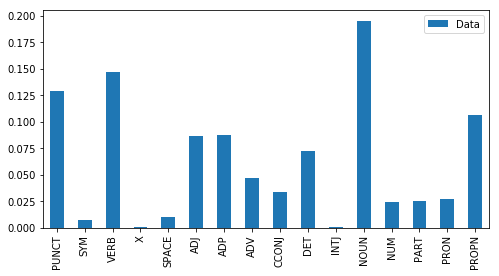

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams

# Make a quick-and-dirty lookup table of POS IDs, 
# since the default representation of a POS is numeric. 
tagDict = {w.pos: w.pos_ for w in pos_doc} 

dataPOS = pd.Series(pos_doc.count_by(spacy.attrs.POS))/len(pos_doc)

rcParams['figure.figsize'] = 8, 4
df = pd.DataFrame([dataPOS], index=['Data'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')

#### Named Entities

A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product or a book title. spaCy can recognise various types of named entities in a document, by asking the model for a prediction

In [22]:
options = {'colors': {'ORG': 'yellow', 'PERSON': 'pink', 'ORG': 'orange'}}
displacy.render(pos_doc, style='ent', jupyter=True, options=options)

#### Let's look at distribution of words and their probabilites

In [23]:
# top unigrams used in the read articles 
from collections import Counter
cleaned_list = [word.string for word in pos_doc]
Counter(cleaned_list) .most_common(15)

[(', ', 269),
 ('the ', 151),
 ('a ', 124),
 ('and ', 106),
 ('to ', 105),
 ('of ', 103),
 ('. ', 102),
 ('is ', 61),
 ('in ', 59),
 ('… ', 56),
 ('[', 56),
 ('+', 56),
 ('chars', 56),
 (']', 56),
 ('for ', 50)]

In [24]:
# define some parameters  
non_noisy_pos_tags = ["PROPN", "NOUN"]
min_token_length = 3

#Function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ not in non_noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif token.is_punct == True or token.is_space == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 

# top unigrams used in the read articles after some quick cleaning
from collections import Counter
cleaned_list = [word.string for word in pos_doc if not isNoise(word)]
Counter(cleaned_list) .most_common(15)

[('chars', 56),
 ('Facebook ', 22),
 ('Samsung ', 14),
 ('Galaxy ', 13),
 ('S10 ', 12),
 ('year', 8),
 ('company ', 8),
 ('what ', 8),
 ('Apple', 7),
 ('Google ', 7),
 ('Apple ', 7),
 ('phone ', 7),
 ('leaks ', 7),
 ('world ', 7),
 ('Samsung', 7)]

In [25]:
# top unigrams used in all the articles after some quick cleaning
from collections import Counter
cleaned_list = [word.string for word in full_doc if not isNoise(word)]
Counter(cleaned_list) .most_common(15)

[('chars', 513),
 ('company ', 94),
 ('Facebook ', 75),
 ('Apple ', 56),
 ('posters ', 56),
 ('what ', 53),
 ('people ', 51),
 ('years ', 46),
 ('New ', 44),
 ('time ', 43),
 ('companies ', 41),
 ('who ', 39),
 ('week', 37),
 ('world ', 36),
 ('year', 36)]

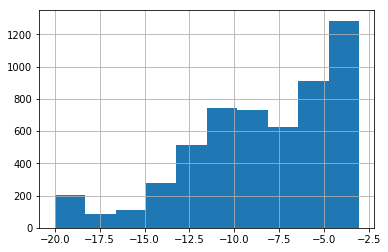

In [26]:
#log_probabilities
probabilities = [word.prob for word in pos_doc] 
pd.Series(probabilities).hist()

rcParams['figure.figsize'] = 8, 4

In [27]:
from collections import Counter

#Now we can do some rudimentary information extraction by counting the improbable words:
Counter([word.string.strip().lower() 
         for word in pos_doc
         if word.prob < -17.5
        and word.is_alpha]
       ).most_common(20)

[('openai', 8),
 ('deepomatic', 5),
 ('guilite', 4),
 ('matebook', 3),
 ('fabula', 3),
 ('tyroprogrammer', 2),
 ('appthe', 2),
 ('recode', 2),
 ('ultrasharp', 2),
 ('number', 2),
 ('itus', 2),
 ('caryn', 2),
 ('marooney', 2),
 ('inov', 2),
 ('alven', 2),
 ('diard', 2),
 ('gimlet', 2),
 ('withings', 2),
 ('lecun', 2),
 ('fortnite', 2)]

#### Let's discard the noise

In [28]:
cleaned_pos_corpus = [word for word in nlp(posLabels_corpus) 
             if (word.pos_== 'PROPN' or word.pos=='NOUN' or word.pos== 'VERB' or word.pos=='ADJ') 
             and (word.prob > -17.5)]

cleaned_pos_corpus

[Mark,
 Zuckerberg,
 Facebook,
 Russia,
 Facebook,
 CEO,
 Mark,
 Zuckerberg,
 Apple,
 FTC,
 Wednesday,
 Facebook,
 CEO,
 th,
 ThinkPad,
 Review,
 Cambridge,
 Audio,
 Yoyo,
 L,
 Sonos,
 Google,
 Sonos,
 Google,
 Apple,
 Sonos,
 Google,
 React,
 React,
 Daily,
 Facebook,
 Apple,
 Mark,
 Zuckerberg,
 Foxconn,
 Wisconsin,
 Americans,
 Roomba,
 Facebook,
 Apple,
 Apple,
 Facebook,
 Apple,
 Android,
 ✔,
 UI,
 K,
 C++,
 UI,
 Android,
 GNU,
 Linux,
 Windows,
 ARM,
 Linux,
 OS,
 MCU,
 Dells,
 QHD,
 Siberia,
 Richard,
 Bert,
 Roberts,
 Colin,
 World,
 AI,
 Oak,
 Ridge,
 National,
 Laboratory,
 Summit,
 Americas,
 Google,
 Facebook,
 Hulu,
 Amazon,
 Prime,
 HBO,
 Netflix,
 Hulu,
 February,
 Netflix,
 Hulu,
 February,
 Panasonic,
 Lumix,
 S1,
 Lumix,
 S1,
 Sony,
 Nikon,
 Canon,
 Panasonic,
 Lumix,
 S1,
 Huawei,
 Huawei,
 Pro,
 Huawei,
 Class,
 Huawei,
 February,
 K,
 OLED,
 Samsung,
 Galaxy,
 S10,
 Self,
 Cars,
 Traffic,
 Parking,
 Adam,
 Millard,
 Ball,
 Finalist,
 Quantum,
 Computer,
 Resistant,

In [29]:
cleaned_full_corpus = [word for word in nlp(full_corpus) 
             if (word.pos_== 'PROPN' or word.pos=='NOUN' or word.pos== 'VERB' or word.pos=='ADJ') 
             and (word.prob > -17.5)]

cleaned_full_corpus[:500]

[Curiosity,
 Curiosity,
 JPL,
 Caltech,
 Leah,
 Crane,
 Hacking,
 NASAs,
 Gale,
 Clare,
 Wilson,
 Super,
 Bowl,
 Patriots,
 Rams,
 Super,
 Bowl,
 Super,
 Bowl,
 New,
 England,
 Patriots,
 LA,
 Rams,
 Hobson,
 Hobson,
 Mark,
 Zuckerberg,
 Facebook,
 Russia,
 Facebook,
 CEO,
 Mark,
 Zuckerberg,
 Apple,
 FTC,
 Wednesday,
 Facebook,
 CEO,
 th,
 Facebook,
 Facebook,
 Instagram,
 Indonesia,
 Southeast,
 Asia,
 Facebook,
 Facebook,
 Instagram,
 Indonesia,
 Southeast,
 Asia,
 Rhinoceros,
 Joshua,
 Hee,
 Stock,
 Photo,
 Michael,
 Marshall,
 Japanese,
 Facebook,
 Google,
 Apple,
 Facebook,
 Google,
 Apple,
 Mixtape,
 Podcast,
 Oracle,
 IBM,
 Megan,
 Rose,
 Dickey,
 Mixtape,
 IBM,
 Megan,
 Rose,
 Dickey,
 Mixtape,
 Pacific,
 Olive,
 Clarion,
 Zone,
 Olive,
 Earths,
 Go,
 2B,
 Series,
 F,
 Indonesia,
 Grab,
 Southeast,
 Asia,
 Series,
 F,
 TechCrunch,
 Indonesia,
 Grab,
 Southeast,
 Asia,
 Series,
 F,
 TechCrunch,
 Facebook,
 Iran,
 Facebook,
 Iran,
 Apple,
 Facebook,
 Apple,
 Facebook,
 Enterpris

#### Word Vectors
"Word vectors" or "word embeddings" are multi-dimensional meaning representations of a word genertaed using algorithms like word2vec

The words "dog", "cat" and "banana" are all pretty common in English, so they're part of spaCy's model's vocabulary, and come with a vector. The word "afskfsd" on the other hand is a lot less common and out-of-vocabulary – so its vector representation consists of 300 dimensions of 0, which means it's practically nonexistent. If your application will benefit from a large vocabulary with more vectors, you should use one of the larger models or loading in a full vector package, for example, en_vectors_web_lg, which includes over 1 million unique vectors.

In [30]:
pos_dataVecs = [word.vector for word in cleaned_pos_corpus]
pos_dataLabels = [word.string.strip() for word in cleaned_pos_corpus]
pos_dataVecs[0].shape

(300,)

In [31]:
full_dataVecs = [word.vector for word in cleaned_full_corpus]
full_dataLabels = [word.string.strip() for word in cleaned_full_corpus]
full_dataVecs[0].shape

(300,)

### 2. KMeans Clustering using word vectors

In [32]:
from sklearn import cluster

kmeans_model = cluster.KMeans(n_clusters=4, max_iter=100)  
X = kmeans_model.fit(pos_dataVecs)
labels=kmeans_model.labels_.tolist()

In [33]:
from sklearn.decomposition import PCA

# To visualzie it in 2-D we reduce dimensionality from 300 to 2
l = kmeans_model.fit_predict(pos_dataVecs)
pca = PCA(n_components=2).fit(pos_dataVecs)
datapoint = pca.transform(pos_dataVecs)

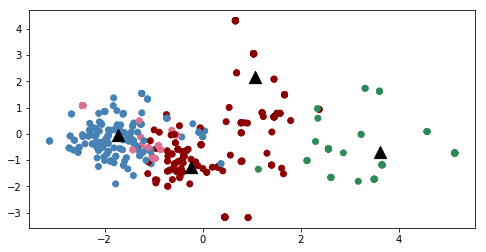

In [34]:
plt.figure
label1 = ["#4682B4", "#2E8B57", "#8B0000","#DB7093", "#7B68EE" ]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [35]:
kmeans_model_clusters = kmeans_model.predict(pos_dataVecs)
kmeans_model_clusters[1: 50]

array([0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 2, 0, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 3, 2,
       1, 2, 1, 1, 3])

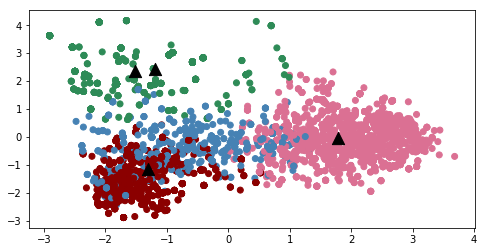

In [36]:
kmeans_model = cluster.KMeans(n_clusters=4, max_iter=100)  
X = kmeans_model.fit(full_dataVecs)
labels=kmeans_model.labels_.tolist()

l = kmeans_model.fit_predict(full_dataVecs)
pca = PCA(n_components=2).fit(full_dataVecs)
datapoint = pca.transform(full_dataVecs)

plt.figure
label1 = ["#4682B4", "#2E8B57", "#8B0000","#DB7093", "#7B68EE" ]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()


In [37]:
kmeans_model_clusters = kmeans_model.predict(full_dataVecs)
kmeans_model_clusters[1: 50]

array([3, 1, 1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3,
       1, 2, 2, 2, 1])

In [38]:
res = []
for (i, desc),title in zip(enumerate(data.text),data['title']):
    row = []
    if(i < 30):
        row.append(kmeans_model_clusters[i])
        row.append(title)
        res.append(row)    


In [39]:
res = sorted(res,key=lambda x: x[0])
prev = 0
for r in res:
    if (r[0] != prev):
        print("--------------------------------")
    prev = r[0]
    print(r)

--------------------------------
[1, 'Super Bowl 2019 live stream: how to watch Patriots vs Rams online for free without commercials']
[1, 'Mellody Hobson thinks too many all-white, all-male companies are committing “corporate suicide”']
[1, 'Mark Zuckerberg wants to get back to building new Facebook products']
[1, 'Facebook removes hundreds of accounts linked to fake news group in Indonesia']
[1, 'Deep-sea mining could wreck the last unexplored ecosystem on Earth']
[1, 'Go-Jek confirms first close of $2B Series F round at $9.5B valuation']
[1, 'Apple breaks Google’s internal iOS apps for the same reason it broke Facebook’s apps']
[1, 'Scuba-diving gear could help clean up carbon dioxide from power plants']
[1, 'The Milky Way may be slowly devouring a hidden neighbouring galaxy']
[1, 'Electric Heavy Equipment is Good for Underground Cities and Space Colonies']
[1, 'Rocket Report: Secret CIA smallsat launcher, Falcon 9 test, Soyuz passes 50']
[1, 'Amazon HQ2 hearing: a huge political ba

### 3. Topic Modeling with Gensim
Latent Dirichlet Allocation (LDA)
Topic modeling is family of techniques that can be used to describe and summarize the documents in a corpus according to a set of latent "topics". Latent Dirichlet Allocation or LDA is a popular approach to topic modeling.

In many conventional NLP applications, documents are represented a mixture of the individual tokens (words and phrases) they contain. In other words, a document is represented as a vector of token counts. There are two layers in this model — documents and tokens — and the size or dimensionality of the document vectors is the number of tokens in the corpus vocabulary. This approach has a number of disadvantages:

Document vectors tend to be large (one dimension for each token  ⇒  lots of dimensions) They also tend to be very sparse. Any given document only contains a small fraction of all tokens in the vocabulary, so most values in the document's token vector are 0. The dimensions are fully indepedent from each other — there's no sense of connection between related tokens, such as knife and fork. LDA injects a third layer into this conceptual model. Documents are represented as a mixture of a pre-defined number of topics, and the topics are represented as a mixture of the individual tokens in the vocabulary. The number of topics is a model hyperparameter. LDA makes a prior assumption that the (document, topic) and (topic, token) mixtures follow Dirichlet probability distributions. This assumption encourages documents to consist mostly of a handful of topics, and topics to consist mostly of a modest set of the tokens.

LDA is fully unsupervised. The topics are "discovered" automatically from the data by trying to maximize the likelihood of observing the documents in your corpus, given the modeling assumptions. They are expected to capture some latent structure and organization within the documents, and often have a meaningful human interpretation for people familiar with the subject material.

##### Basically:
1. LDA considers two things:​

    -- Each document in a corpus is a weighted combination of several topics, e.g.,​

                    doc1-> 0.1 finance + 0.2 science + 0.5 * technology,…​

    -- Each topic has its collection of representative keywords, e.g.,​

                    technology -> [‘computer’, ‘microsoft’, ‘google', ...]​
                    
2. The two probability distributions that the algorithm tries to approximate, starting from a random initialization until convergence:​

    -- For a given document, what is the distribution of topics that describe it?​

    -- For a given topic, what is the distribution of its words or what is the importance (probability) of each word in defining the topic nature?​

In [40]:
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [41]:
# LDA needs input in a diff format so we will use this method to extract data again but in a diff format
def CreateArrayOfParsedDocuments(content):
    texts, article = [], []
    for word in nlp(content):
        if (word.pos_== 'PROPN' or word.pos=='NOUN' or word.pos== 'VERB' or word.pos=='ADJ') and (word.prob > -17.5):
            article.append(word.lemma_)
        # if it's a new line, it means we're onto our next document
        if word.text == '\n':
            texts.append(article)
            article = []
    return texts;

In [42]:
full_content = data['text'].str.cat(sep='\n')
texts = CreateArrayOfParsedDocuments(full_content)

In [43]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = LdaModel(corpus=corpus, num_topics=4, id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.015*"ai" + 0.014*"facebook" + 0.013*"us" + 0.011*"apple" + 0.008*"trump" + 0.008*"ceo" + 0.007*"getty" + 0.007*"uk" + 0.007*"google" + 0.006*"bitcoin"'),
 (1,
  '0.017*"samsung" + 0.016*"apple" + 0.014*"galaxy" + 0.013*"amazon" + 0.013*"s10" + 0.012*"new" + 0.010*"iphone" + 0.009*"india" + 0.009*"twitter" + 0.008*"netflix"'),
 (2,
  '0.032*"facebook" + 0.012*"twitter" + 0.011*"us" + 0.009*"new" + 0.009*"apple" + 0.008*"react" + 0.007*"hooks" + 0.007*"musk" + 0.006*"ai" + 0.006*"u.s."'),
 (3,
  '0.020*"google" + 0.020*"apple" + 0.019*"facebook" + 0.011*"china" + 0.008*"new" + 0.008*"super" + 0.007*"spacex" + 0.007*"bowl" + 0.006*"microsoft" + 0.005*"sonos"')]

In [45]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.144871 -0.008932       1        1  27.019796
3     -0.035225  0.096293       2        1  26.799938
0     -0.054123 -0.117696       3        1  24.563385
2     -0.055523  0.030335       4        1  21.616875, topic_info=     Category       Freq        Term      Total  loglift  logprob
531   Default  16.000000      galaxy  16.000000  30.0000  30.0000
532   Default  15.000000         s10  15.000000  29.0000  29.0000
20    Default  73.000000    facebook  73.000000  28.0000  28.0000
341   Default  18.000000       china  18.000000  27.0000  27.0000
281   Default  14.000000      iphone  14.000000  26.0000  26.0000
393   Default  27.000000     samsung  27.000000  25.0000  25.0000
230   Default   7.000000       react   7.000000  24.0000  24.0000
39    Default  38.000000      google  38.000000  23.0000  23.0000
283   Default   9.000000    nintendo   9.000000  22.0000  22.0000
179   Default  15.000000       india  15.000000  21.0000  21.0000
500   Default   6.000000       hooks   6.000000  20.0000  20.0000
292   Default  28.000000          ai  28.000000  19.0000  19.0000
953   Default  24.000000     twitter  24.000000  18.0000  18.0000
16    Default  12.000000       super  12.000000  17.0000  17.0000
10    Default  12.000000        bowl  12.000000  16.0000  16.0000
206   Default   6.000000       sonos   6.000000  15.0000  15.0000
610   Default   6.000000     surface   6.000000  14.0000  14.0000
63    Default  10.000000       getty  10.000000  13.0000  13.0000
816   Default  10.000000       march  10.000000  12.0000  12.0000
762   Default   7.000000       jones   7.000000  11.0000  11.0000
146   Default   6.000000    national   6.000000  10.0000  10.0000
649   Default   9.000000        musk   9.000000   9.0000   9.0000
525   Default  12.000000       trump  12.000000   8.0000   8.0000
1483  Default   5.000000     rihanna   5.000000   7.0000   7.0000
854   Default   5.000000       skype   5.000000   6.0000   6.0000
676   Default  10.000000          vr  10.000000   5.0000   5.0000
13    Default  32.000000         new  32.000000   4.0000   4.0000
485   Default   4.000000   alzheimer   4.000000   3.0000   3.0000
323   Default   5.000000          lg   5.000000   2.0000   2.0000
1032  Default   8.000000      nissan   8.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
1110   Topic4   1.532512     general   2.094956   1.2191  -6.3925
46     Topic4   1.532545        rose   2.095037   1.2191  -6.3925
649    Topic4   6.105222        musk   9.090874   1.1336  -5.0103
682    Topic4   2.894400     william   4.200505   1.1593  -5.7567
36     Topic4   2.889860       photo   4.197983   1.1583  -5.7582
640    Topic4   2.878930      chrome   4.202097   1.1535  -5.7620
153    Topic4   5.633742        u.s.   9.169724   1.0446  -5.0907
57     Topic4   4.798027  techcrunch   7.797748   1.0461  -5.2512
849    Topic4   3.186524         bbc   4.902081   1.1010  -5.6605
1010   Topic4   3.532375        deal   5.624875   1.0665  -5.5575
648    Topic4   2.352335          ev   3.498791   1.1347  -5.9640
20     Topic4  28.939911    facebook  73.789597   0.5957  -3.4542
1032   Topic4   4.882808      nissan   8.470606   0.9808  -5.2337
606    Topic4   5.187706     spotify   9.226028   0.9560  -5.1732
953    Topic4  10.677631     twitter  24.481417   0.7019  -4.4513
647    Topic4   4.452743        elon   7.743259   0.9784  -5.3259
196    Topic4  10.103600          us  33.898121   0.3212  -4.5066
1012   Topic4   3.590172       green   6.379352   0.9568  -5.5412
13     Topic4   8.341413         new  32.916756   0.1589  -4.6982
341    Topic4   5.571299       china  18.018915   0.3579  -5.1018
56     Topic4   3.582598      series   8.558784   0.6608  -5.5434
292    Topic4   5.847625          ai  28.200844  -0.0416  -5.0534
18     Topic4   7.965581       apple  61.026325  -0.5045  -4.7443
10 

In [46]:
pos_content = data.loc[data['label'] == 1]['text'].str.cat(sep='\n')
texts_pos = CreateArrayOfParsedDocuments(pos_content)

In [47]:
dictionary = Dictionary(texts_pos)
corpus_pos = [dictionary.doc2bow(text) for text in texts_pos]

ldamodel = LdaModel(corpus=corpus_pos, num_topics=4, id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.066*"ai" + 0.063*"facebook" + 0.035*"google" + 0.025*"sony" + 0.016*"samsung" + 0.016*"musk" + 0.016*"blu" + 0.016*"leaf" + 0.013*"s1" + 0.013*"february"'),
 (1,
  '0.070*"samsung" + 0.044*"galaxy" + 0.041*"s10" + 0.024*"iphone" + 0.024*"thinkpad" + 0.022*"ui" + 0.017*"x1" + 0.017*"lenovo" + 0.017*"carbon" + 0.017*"mate"'),
 (2,
  '0.057*"samsung" + 0.051*"s10" + 0.048*"galaxy" + 0.031*"february" + 0.031*"apple" + 0.028*"huawei" + 0.023*"google" + 0.021*"hulu" + 0.021*"reply" + 0.019*"amazon"'),
 (3,
  '0.071*"facebook" + 0.042*"apple" + 0.031*"ai" + 0.027*"mark" + 0.026*"uk" + 0.022*"zuckerberg" + 0.017*"sandra" + 0.017*"bullock" + 0.017*"macs" + 0.015*"trump"')]

In [48]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus_pos, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.114422 -0.096556       1        1  33.438511
0      0.084151  0.111861       2        1  27.476662
2     -0.096063  0.010228       3        1  21.166842
1     -0.102511 -0.025533       4        1  17.917994, topic_info=    Category       Freq             Term      Total  loglift  logprob
68   Default  13.000000          samsung  13.000000  30.0000  30.0000
66   Default   8.000000           galaxy   8.000000  29.0000  29.0000
67   Default   8.000000              s10   8.000000  28.0000  28.0000
41   Default  13.000000               ai  13.000000  27.0000  27.0000
2    Default  20.000000         facebook  20.000000  26.0000  26.0000
63   Default   3.000000           huawei   3.000000  25.0000  25.0000
213  Default   2.000000           iphone   2.000000  24.0000  24.0000
4    Default   4.000000             mark   4.000000  23.0000  23.0000
9    Default   2.000000         thinkpad   2.000000  22.0000  22.0000
0    Default  10.000000            apple  10.000000  21.0000  21.0000
61   Default   3.000000             sony   3.000000  20.0000  20.0000
31   Default   4.000000               ui   4.000000  19.0000  19.0000
53   Default   2.000000             hulu   2.000000  18.0000  18.0000
116  Default   2.000000            reply   2.000000  17.0000  17.0000
51   Default   5.000000         february   5.000000  16.0000  16.0000
12   Default   8.000000           google   8.000000  15.0000  15.0000
8    Default   3.000000       zuckerberg   3.000000  14.0000  14.0000
49   Default   2.000000           amazon   2.000000  13.0000  13.0000
197  Default   1.000000               x1   1.000000  12.0000  12.0000
194  Default   1.000000           lenovo   1.000000  11.0000  11.0000
192  Default   1.000000           carbon   1.000000  10.0000  10.0000
138  Default   1.000000             mate   1.000000   9.0000   9.0000
136  Default   1.000000           health   1.000000   8.0000   8.0000
79   Default   1.000000        institute   1.000000   7.0000   7.0000
85   Default   1.000000        standards   1.000000   6.0000   6.0000
86   Default   1.000000       technology   1.000000   5.0000   5.0000
44   Default   2.000000         national   2.000000   4.0000   4.0000
211  Default   1.000000          macbook   1.000000   3.0000   3.0000
212  Default   1.000000             ming   1.000000   2.0000   2.0000
209  Default   1.000000              chi   1.000000   1.0000   1.0000
..       ...        ...              ...        ...      ...      ...
193   Topic4   0.769566            ipads   1.289599   1.2031  -4.6803
196   Topic4   0.769525             wifi   1.289623   1.2030  -4.6803
195   Topic4   0.768357             roku   1.289730   1.2014  -4.6819
215   Topic4   0.767278           patent   1.289902   1.1999  -4.6833
214   Topic4   0.767223           office   1.289889   1.1998  -4.6833
137   Topic4   0.767167               hr   1.289950   1.1997  -4.6834
216   Topic4   0.766926        trademark   1.289896   1.1994  -4.6837
140   Topic4   0.766713            steel   1.289975   1.1991  -4.6840
144   Topic4   0.761106            adobe   1.290489   1.1914  -4.6913
146   Topic4   0.756929        photoshop   1.291244   1.1853  -4.6968
145   Topic4   0.756213           master   1.291235   1.1843  -4.6978
77    Topic4   0.747344         computer   1.295785   1.1690  -4.7096
84    Topic4   0.746457  standardization   1.296177   1.1675  -4.7108
82    Topic4   0.743567          quantum   1.296860   1.1631  -4.7147
81    Topic4   0.742609                q   1.297216   1.1616  -4.7159
83    Topic4   0.738643        resistant   1.298322   1.1554  -4.7213
78    Topic4   0.735087         finalist   1.299236   1.1498  -4.7261
188   Topic4   0.729594              one   1.300878   1.1411  -4.7336
76    Topic4   0.728909       algorithms   1.300955   1.1401  -4.7346
80    Topic4   0.727926             long   1.301255   1.1385  -